A project done for CS439: Introduction to Data Science

Instructor:
Sir Farhan

Contributors:
1. Omer Munam - 2017219
2. Annas Ali - 2017074
3. M. Kashif - 2017287

# In-Depth Analysis of Used Cars Listed On Ebay in United Kingdom

We plan to find any sort trend or feature that may help us estimate the price of cars and help the potential buyers to make an informed decision.

Download the dataset from [here](https://www.kaggle.com/bozungu/used-cars-listing-from-ebay/download).

## Data Cleaning

In [79]:
import pandas as pd
import numpy as np

autos_new = pd.read_csv('Dataset/autos_new.csv')
autos_new.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online
0,2016-03-24,A5_Sportback_2.7_Tdi,18300,coupé,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,66954,2016-04-07
1,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",9800,NaN,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,90480,2016-04-05
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,small car,2001,manuell,75,golf,150000,6,gasoline,volkswagen,nein,2016-03-17,91074,2016-03-17
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,60437,2016-04-06
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,gasoline,bmw,ja,2016-04-04,33775,2016-04-06


In [80]:
# Drop Null Values
autos_new = autos_new.dropna()

In [81]:
autos_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235829 entries, 2 to 335110
Data columns (total 16 columns):
date_crawled          235829 non-null object
name                  235829 non-null object
dollar_price          235829 non-null int64
vehicle_type          235829 non-null object
registration_year     235829 non-null int64
gearbox               235829 non-null object
power_ps              235829 non-null int64
model                 235829 non-null object
kilometer             235829 non-null int64
registration_month    235829 non-null int64
fuel_type             235829 non-null object
brand                 235829 non-null object
unrepaired_damage     235829 non-null object
ad_created            235829 non-null object
postal_code           235829 non-null int64
last_seen_online      235829 non-null object
dtypes: int64(6), object(10)
memory usage: 30.6+ MB


In [82]:
# Replace wrong spelling or language of words
autos_new = autos_new.replace(['nein', 'ja', 'manuell', 'automatik'], ['no', 'yes', 'manual', 'automatic'])

In [83]:
# Converting PS to HP and ignoring unreal power values.
autos_new['power_ps'] = autos_new['power_ps']*0.9863
autos_new = autos_new.rename(columns={'power_ps': 'power_hp'})
autos_new = autos_new[autos_new['power_hp'] < 600]

#### Here we are going to map the non-numeric values to numeric ones

In [84]:
vehicle_types = autos_new['vehicle_type'].unique()
vehicle_type_dict = dict(zip(vehicle_types,range(len(vehicle_types))))
vehicle_type_dict

{'small car': 0,
 'limousine': 1,
 'convertible': 2,
 'station wagon': 3,
 'bus': 4,
 'coupé': 5,
 'other': 6}

In [85]:
range(len(vehicle_types))

range(0, 7)

In [86]:
gearbox = autos_new['gearbox'].unique()
gearbox_dict = dict(zip(gearbox,range(len(gearbox))))
gearbox_dict

{'manual': 0, 'automatic': 1}

In [87]:
fuel_types = autos_new['fuel_type'].unique()
fuel_types_dict = dict(zip(fuel_types,range(len(fuel_types))))
fuel_types_dict

{'gasoline': 0,
 'diesel': 1,
 'liquefied petroleum gas': 2,
 'other': 3,
 'compressed natural gas': 4}

In [88]:
unrepaired_damage = autos_new['unrepaired_damage'].unique()
unrepaired_damage_dict = dict(zip(unrepaired_damage,range(len(unrepaired_damage))))
unrepaired_damage_dict

{'no': 0, 'yes': 1}

In [89]:
autos_new['vehicle_type'] = autos_new['vehicle_type'].map(vehicle_type_dict)
autos_new['gearbox'] = autos_new['gearbox'].map(gearbox_dict)
autos_new['fuel_type'] = autos_new['fuel_type'].map(fuel_types_dict)
autos_new['unrepaired_damage'] = autos_new['unrepaired_damage'].map(unrepaired_damage_dict)

In [90]:
autos_new['date_crawled'] = pd.to_datetime(autos_new['date_crawled'])
autos_new['ad_created'] = pd.to_datetime(autos_new['ad_created'])
autos_new['last_seen_online'] = pd.to_datetime(autos_new['last_seen_online'])

#### Only considering ads posted in the year 2016 to ensure relevance

In [103]:
import datetime as dt

autos_new = autos_new[autos_new['ad_created'].dt.year == 2016]
autos_new.head()

,date_crawled,name,dollar_price,vehicle_type,registration_year,gearbox,power_hp,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen_online
2,2016-03-17,GOLF_4_1_4__3TÜRER,1500,0,2001,0,73.9725,golf,150000,6,0,volkswagen,0,2016-03-17,91074,2016-03-17
3,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,3600,0,2008,0,68.0547,fabia,90000,7,1,skoda,0,2016-03-31,60437,2016-04-06
4,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,1,1995,0,100.6026,3er,150000,10,0,bmw,1,2016-04-04,33775,2016-04-06
5,2016-04-01,Peugeot_206_CC_110_Platinum,2200,2,2004,0,107.5067,2_reihe,150000,8,0,peugeot,0,2016-04-01,67112,2016-04-05
8,2016-03-26,Mazda_3_1.6_Sport,2000,1,2004,0,103.5615,3_reihe,150000,12,0,mazda,0,2016-03-26,96224,2016-04-06


In [92]:
def getcol(colname):
    return autos_new[colname]

In [93]:
numcols = autos_new.select_dtypes(include=np.number).columns.tolist()
numcols

['dollar_price',
 'vehicle_type',
 'registration_year',
 'gearbox',
 'power_hp',
 'kilometer',
 'registration_month',
 'fuel_type',
 'unrepaired_damage',
 'postal_code']

## Data Visualisation

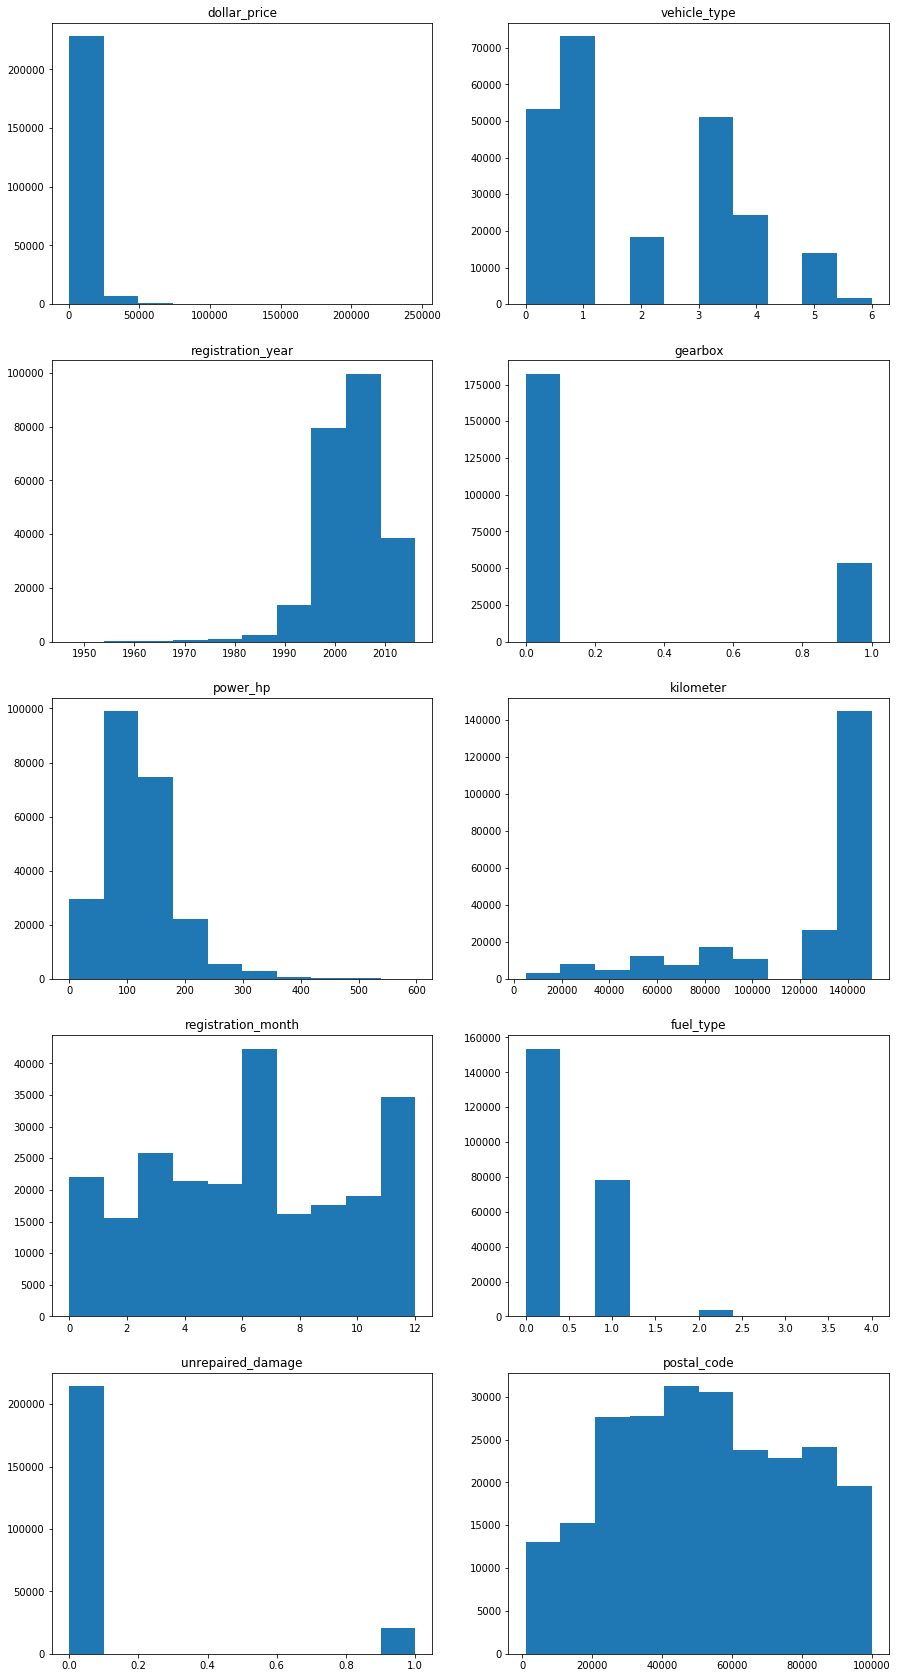

In [94]:
import pylab
%matplotlib inline

k=0
fig, ax = pylab.subplots(5, 2)
for i in range(5):
    for j in range(2):
        ax[i, j].hist(getcol(numcols[k]))
        ax[i,j].set_title(numcols[k])
        k+=1

fig.set_figheight(30)
fig.set_figwidth(15)

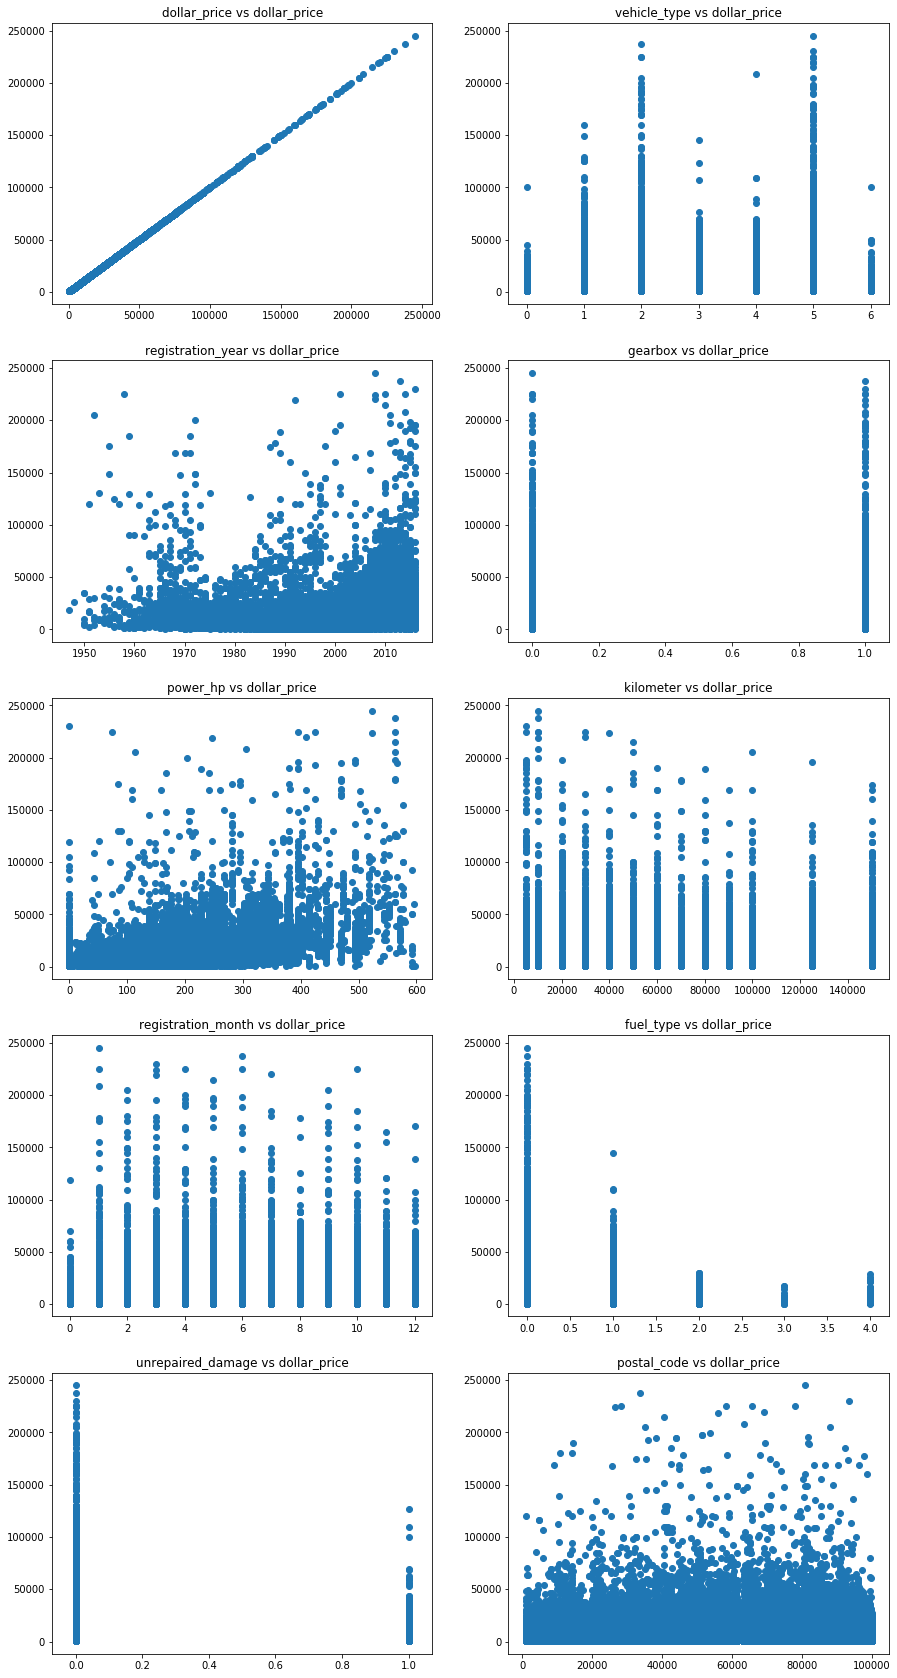

In [95]:
import pylab
%matplotlib inline

price = getcol("dollar_price")

k=0
fig, ax = pylab.subplots(5, 2)
for i in range(5):
    for j in range(2):
        
        ax[i, j].scatter(getcol(numcols[k]), price)
        ax[i,j].set_title(numcols[k] + " vs dollar_price")
        k+=1

fig.set_figheight(30)
fig.set_figwidth(15)

### Analysing the plots

##### Vehicle Type VS Price
There is no visible relation, however, we can see that Coupe and Convertible Cars can be more expensive than others.

##### Registration Year VS Price
Here the relation is clearly visible as the prices of cars are high generally if they are registered in the recent years, apart from some exceptions of potential old cars which fall under classic category.

##### Kilometer VS Price
We can see that the graph is much denser at higher prices when the mileage of the car is low, which shows that the car which is low on mileage has a higher value.

##### Fuel Type VS Price
The representation here is strong, proving that gasoline cars are very high in value comparing to others, with diesel cars coming right after them.

##### Unrepaired Damage VS Price
The widely dense plot of the no-damage category, especially, in the high value region shows that the car is definitely and obviously worth more if it has pending damage.

##### Power VS Price
There also exists a positive weak correlation between power and price, that can not be seen directly in the scatter plot, but when we will plot a regression line on the graph we can see that with increasing power the price is also set to increase.

### Trying to find a strong correlation between a specific feature and price

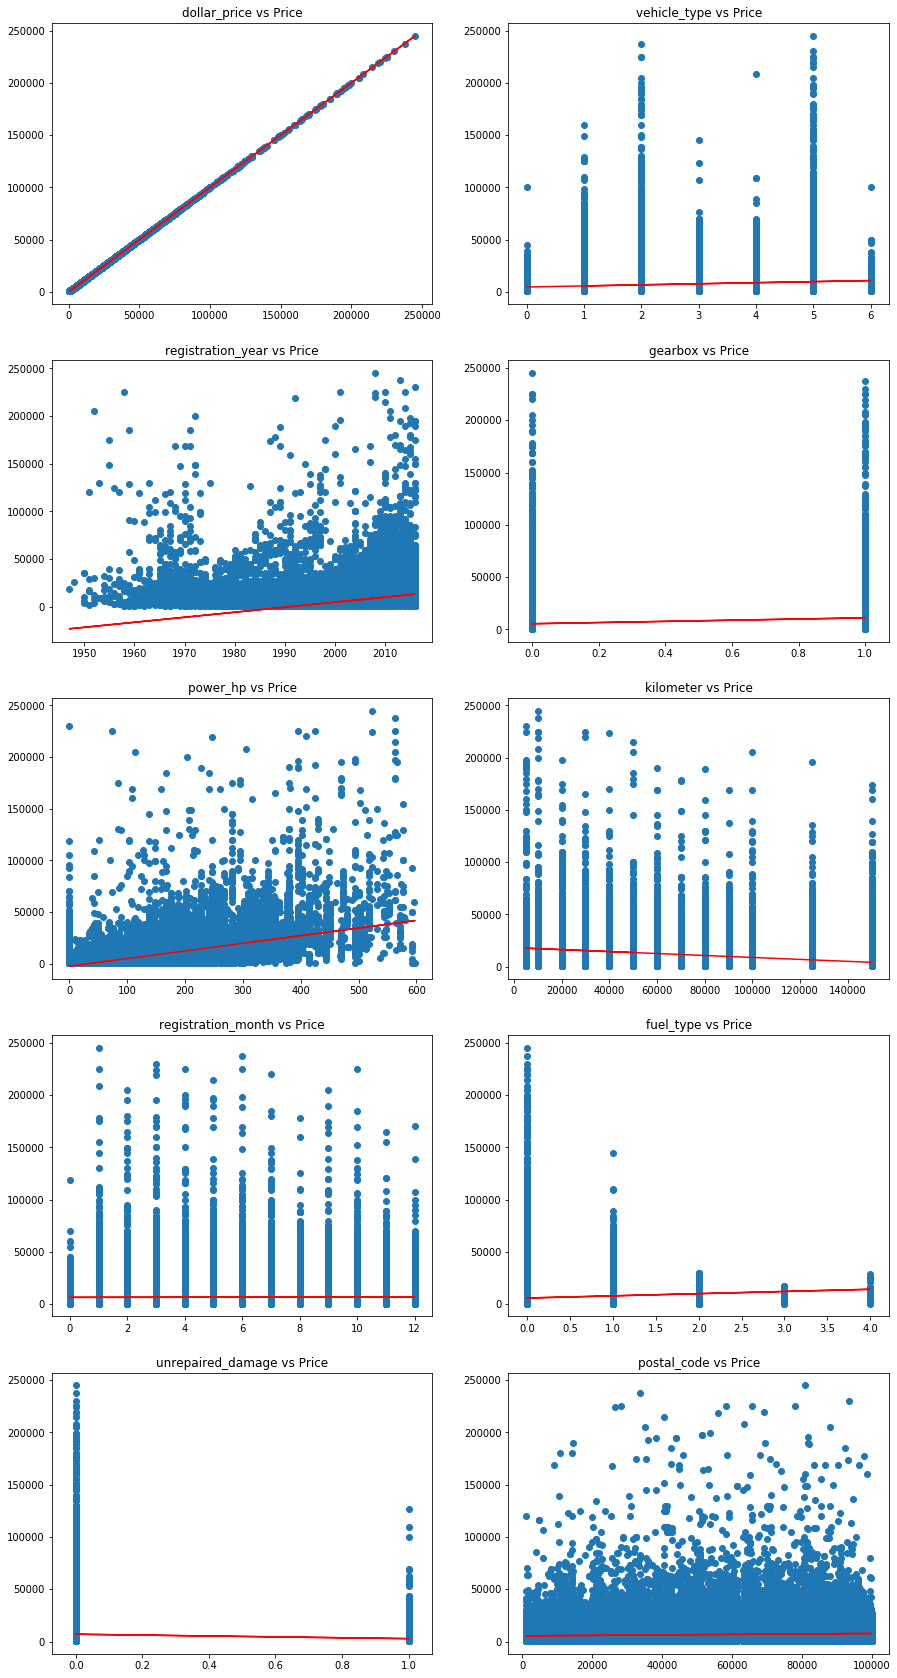

In [96]:
import pylab
%matplotlib inline

price = getcol("dollar_price")

k=0
fig, ax = pylab.subplots(5, 2)
for i in range(5):
    for j in range(2):
        arr = np.array(getcol(numcols[k])).astype(np.float)
        ax[i,j].scatter(arr , price)
        m, b = np.polyfit(arr, price, 1)
        ax[i,j].plot(arr, m*arr + b, '-', color='red')
        ax[i,j].set_title(numcols[k] + " vs Price")
        k+=1

fig.set_figheight(30)
fig.set_figwidth(15)

## Prediction Error

In [102]:
residuals = np.zeros([5,2])
# TODO get the residuals returned by polyfit
k=0
for i in range (5):
    for j in range (2):
        m, res, _, _, _ = np.polyfit(getcol(numcols[k]), price, 1, full=True)
        residuals[i][j] = res
        k=k+1

total_points = len(getcol(numcols[1]))
ms = residuals / total_points
rms_residuals = np.sqrt(ms)
rms_residuals

array([[4.82302773e-10, 8.36724653e+03],
       [7.83703163e+03, 8.19014631e+03],
       [7.12287703e+03, 7.67777643e+03],
       [8.51987353e+03, 8.44711987e+03],
       [8.43413285e+03, 8.50016691e+03]])

We can see that the rms residuals and thus the error for all of the predictions are very high. Thus we can say that predicting price of a car using any single feature is not feasible, which is also visible in the linear regression lines plotted above.

## Analysis And Conclusion

In [105]:
price.describe()

count    235659.000000
mean       6633.060868
std        8520.306090
min         500.000000
25%        1700.000000
50%        3900.000000
75%        8500.000000
max      245000.000000
Name: dollar_price, dtype: float64

In the Ebay used car market we can find cars ranging from 500USD upto 245000USD with prices averaging at about 6000$. Although there is not a single specific feature that determines the price; one can consider a collection of features he/she wants and get a rough estimate of the price that he will have to pay for that features.

###### If a person is looking for cars on a tight budget then the features he/she needs to avoid are:
1. Body Type: Coupe And Convertible
2. Registration Year: Look for older cars that are not classics
3. Kilometer: Look for a low mileage car
4. Fuel Type: Go with alternatives to Gasoline as there are pretty expensive cars in that category
5. Unrepaired Damage: Look for a car with a damage that is not that big of a deal, you can get even slightly damaged cars at lower prices
6. Power: Go with low powered cars, as they are available for cheaper rates than the contrary

###### We believe that we have done our part, if you have read our analysis thoroughly then hopefully you can make the best decision and get the right car in your budget.